In [2]:
%pylab inline
import os
import keras
import numpy as np
import pandas as pd
import keras.backend as K

from time import time
from sklearn.cluster import KMeans
from keras import callbacks
from keras.models import Model
from keras.optimizers import SGD
from keras.layers import Dense, Input
from keras.initializers import VarianceScaling
from keras.engine.topology import Layer, InputSpec

from scipy.misc import imread
from sklearn.metrics import accuracy_score, normalized_mutual_info_score

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [0]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
#print('Found GPU at: {}'.format(device_name))

from tensorflow.python.client import device_lib
#print(device_lib.list_local_devices())

In [28]:
# get data
from keras.datasets import fashion_mnist
(train_x, train_y), (val_x, val_y) = fashion_mnist.load_data()
train_x.shape

(60000, 28, 28)

In [0]:
train_x = train_x/255.
val_x = val_x/255.

train_x = train_x.reshape(-1, 784)
val_x = val_x.reshape(-1, 784)

In [0]:
# define autoencoder
# this is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(2000, activation='relu')(input_img)
encoded = Dense(500, activation='relu')(encoded)
encoded = Dense(500, activation='relu')(encoded)
encoded = Dense(10, activation='sigmoid')(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(500, activation='relu')(encoded)
decoded = Dense(500, activation='relu')(decoded)
decoded = Dense(2000, activation='relu')(decoded)
decoded = Dense(784)(decoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [47]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 2000)              1570000   
_________________________________________________________________
dense_18 (Dense)             (None, 500)               1000500   
_________________________________________________________________
dense_19 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_20 (Dense)             (None, 10)                5010      
_________________________________________________________________
dense_21 (Dense)             (None, 500)               5500      
_________________________________________________________________
dense_22 (Dense)             (None, 500)               250500    
__________

In [0]:
# run the autoencoder
encoder = Model(input_img, encoded)
autoencoder.compile(optimizer='adam', loss='mse')
estop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')

In [49]:
train_history = autoencoder.fit(train_x, train_x, epochs=500, batch_size=2048, validation_data=(val_x, val_x), callbacks=[estop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/500
60000/60000 [==============================] - 3s 58us/step - loss: 0.0910 - val_loss: 0.0667
Epoch 2/500
60000/60000 [==============================] - 2s 33us/step - loss: 0.0525 - val_loss: 0.0433
Epoch 3/500
60000/60000 [==============================] - 2s 33us/step - loss: 0.0404 - val_loss: 0.0369
Epoch 4/500
60000/60000 [==============================] - 2s 33us/step - loss: 0.0350 - val_loss: 0.0323
Epoch 5/500
60000/60000 [==============================] - 2s 33us/step - loss: 0.0321 - val_loss: 0.0292
Epoch 6/500
60000/60000 [==============================] - 2s 33us/step - loss: 0.0278 - val_loss: 0.0263
Epoch 7/500
60000/60000 [==============================] - 2s 33us/step - loss: 0.0255 - val_loss: 0.0246
Epoch 8/500
60000/60000 [==============================] - 2s 33us/step - loss: 0.0244 - val_loss: 0.0236
Epoch 9/500
60000/60000 [==============================] - 2s 33us/step - loss: 0.0231 - val_loss: 0.0

In [0]:
pred = autoencoder.predict(val_x)


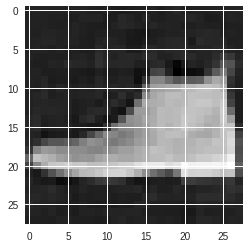

In [51]:
plt.imshow(pred[0].reshape(28, 28), cmap='gray')


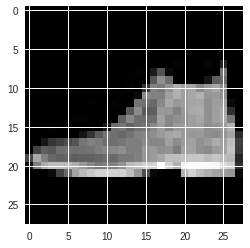

In [52]:
plt.imshow(val_x[0].reshape(28, 28), cmap='gray')
